---
title: "EDA"
---

In [69]:
import pandas as pd
import ast
import networkx as nx
from itertools import combinations
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [53]:
df = pd.read_csv("../data/processed/cleaned_movies.csv")

In [54]:
list_columns = ["Genre", "Actors", "Directors"]

for col in list_columns:
    df[col] = df[col].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])

## Ratings Distributions

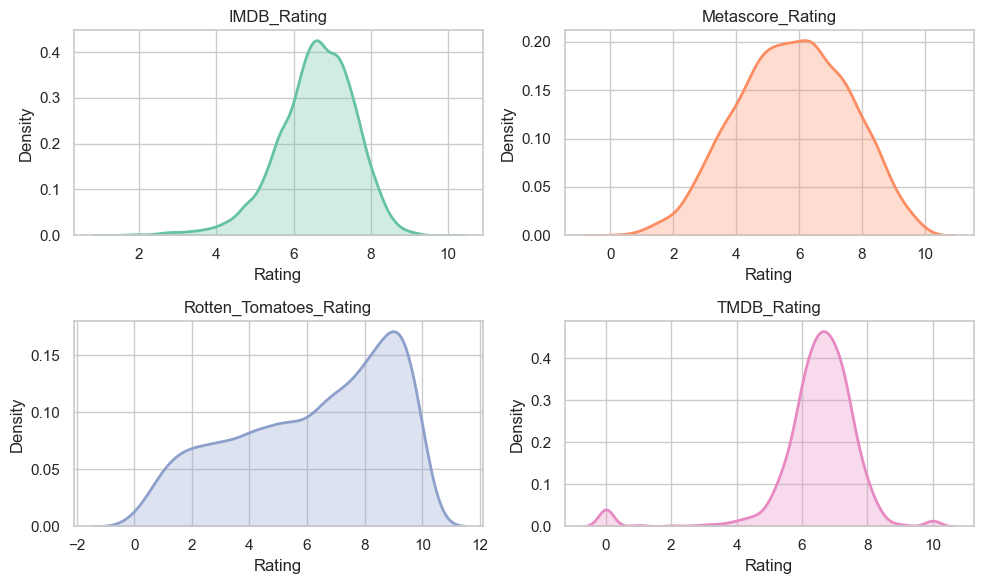

In [79]:
ratings = ["IMDB_Rating", "Metascore_Rating", "Rotten_Tomatoes_Rating", "TMDB_Rating"]
colors = sns.color_palette("Set2", len(ratings))

plt.figure(figsize = (10, 6))

for i, (rating, color) in enumerate(zip(ratings, colors), 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(
        data = df[rating].dropna(),
        fill = True,
        color = color,
        alpha = 0.3,
        linewidth = 2,
        label = rating
    )
    plt.title(rating)
    plt.xlabel("Rating")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

## Genre Count Plots

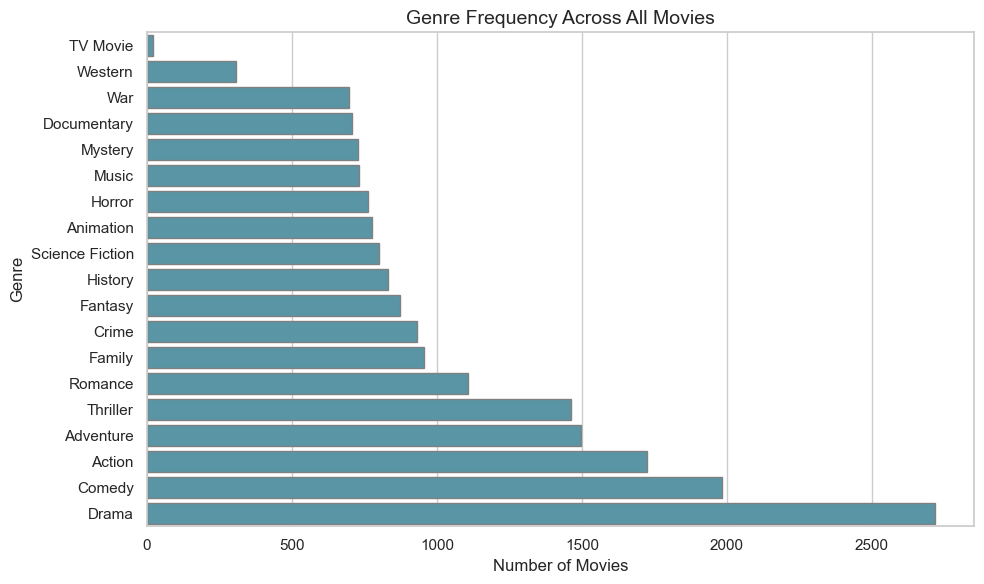

In [78]:
# Flatten genre lists and count frequency
genre_counts = Counter([genre for genres in df["Genre"] for genre in genres])

# Convert to DataFrame and sort
genre_df = pd.DataFrame(genre_counts.items(), columns = ["Genre", "Count"])
genre_df = genre_df.sort_values("Count", ascending = True)  # for horizontal plot

# Set plot style
sns.set(style = "whitegrid")
palette = sns.color_palette("pastel")

# Create the figure
plt.figure(figsize = (10, 6))
barplot = sns.barplot(
    data = genre_df,
    y = "Genre",
    x = "Count",
    color = "#4d9cb2",
    edgecolor = "gray"
)


# Final formatting
plt.title("Genre Frequency Across All Movies", fontsize = 14)
plt.xlabel("Number of Movies", fontsize = 12)
plt.ylabel("Genre", fontsize = 12)
plt.tight_layout()
plt.show()


## Number of Distinct Actors and Directors

In [81]:
# Flatten and deduplicate
all_actors = set(actor.strip() for sublist in df["Actors"] for actor in sublist)
all_directors = set(director.strip() for sublist in df["Directors"] for director in sublist)
all_producers = set(producer.strip() for sublist in df["Producers"] for producer in sublist)
all_writers = set(writer.strip() for sublist in df["Writers"] for writer in sublist)
all_companies = set(company.strip() for sublist in df["Production_Companies"] for company in sublist)


print(f"Total distinct actors: {len(all_actors)}")
print(f"Total distinct directors: {len(all_directors)}")
print(f"Total distinct producers: {len(all_producers)}")
print(f"Total distinct writers: {len(all_writers)}")
print(f"Total distinct production companies: {len(all_companies)}")

Total distinct actors: 31291
Total distinct directors: 3860
Total distinct producers: 148
Total distinct writers: 140
Total distinct production companies: 359


## Budget vs Revenue Scatterplot

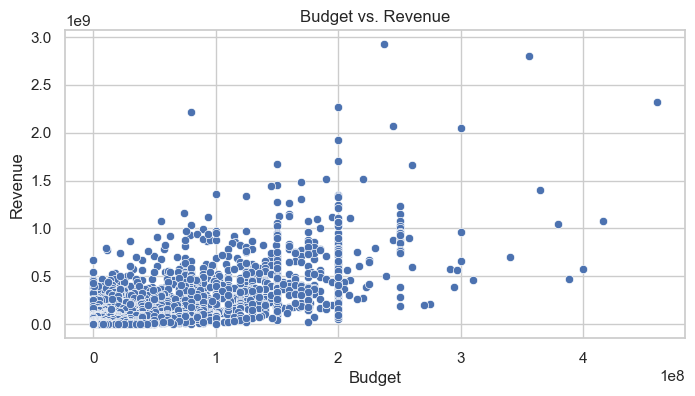

In [77]:
plt.figure(figsize = (8, 4))
sns.scatterplot(x = "Budget", y = "Revenue", data = df)
plt.title("Budget vs. Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()